## 01. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
plt.rcParams['axes.unicode_minus'] = False
rc('font', family='Malgun Gothic')

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings(action='ignore')

### 1. 데이터 불러오기 및 이상치 처리

In [3]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

train = train_raw.copy()
test = test_raw.copy()
train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [5]:
train.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

- train 데이터 개수 : 96294
- object 타입 column : ID, 대출기간, 근로기간, 주택소유상태, 대출목적, 대출등급
- 결측치 없음
- ID column은 고객 고유 ID이므로 추세를 확인하는 분석에서는 필요한 데이터가 아님(drop해도 상관없음)

In [6]:
train.describe(include='all')

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
count,96294,9.629400e+04,96294,96294,96294,9.629400e+04,96294.000000,96294.000000,96294,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294
unique,96294,NaN,2,16,4,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,7
top,TRAIN_00000,NaN,36 months,10+ years,MORTGAGE,NaN,NaN,NaN,부채 통합,NaN,NaN,NaN,NaN,NaN,B
freq,1,NaN,64479,31585,47934,NaN,NaN,NaN,55150,NaN,NaN,NaN,NaN,NaN,28817
mean,NaN,1.830400e+07,NaN,NaN,NaN,9.392672e+07,19.379590,25.304827,NaN,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805,NaN
std,NaN,1.032908e+07,NaN,NaN,NaN,9.956871e+07,33.569559,12.088566,NaN,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966,NaN
min,NaN,1.200000e+06,NaN,NaN,NaN,0.000000e+00,0.000000,4.000000,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN
25%,NaN,1.020000e+07,NaN,NaN,NaN,5.760000e+07,12.650000,17.000000,NaN,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000,NaN
50%,NaN,1.680000e+07,NaN,NaN,NaN,7.800000e+07,18.740000,24.000000,NaN,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000,NaN
75%,NaN,2.400000e+07,NaN,NaN,NaN,1.128000e+08,25.540000,32.000000,NaN,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000,NaN


- 연속형 변수 : 대출금액, 연간소득, 부채_대비_소득_비율, 총계좌수, 최근_2년간_연체_횟수, 총상환원금, 총상환이자, 총연체금액, 연체계좌수
- 범주형 변수 : ID, 대출기간, 근로기간, 주택소유상태, 대출목적
- target 변수 : 대출등급

### Outlier 확인

**부채_대비_소득_비율**

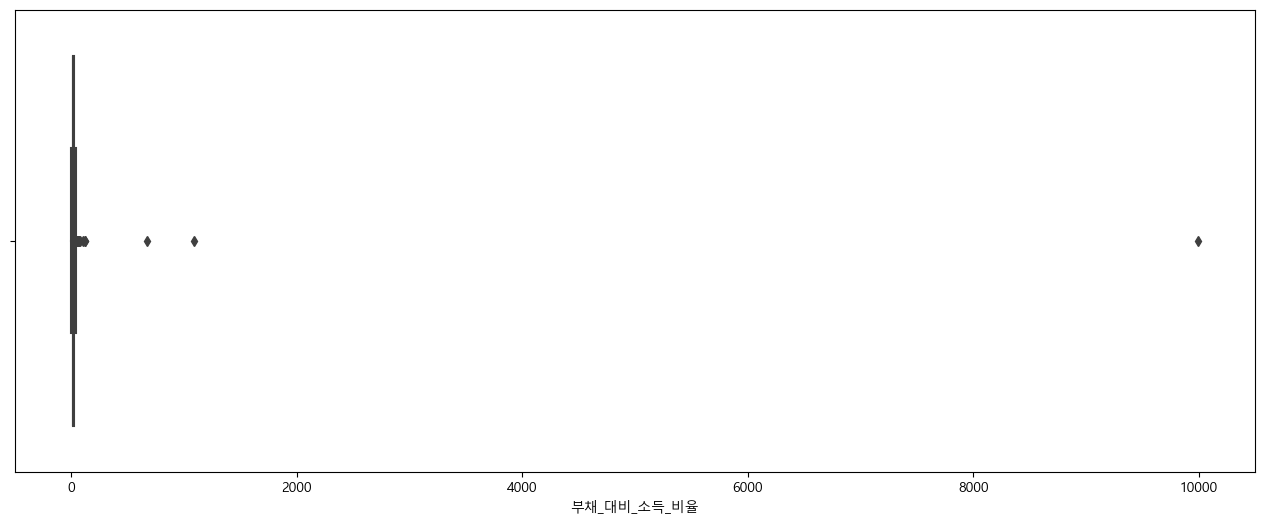

In [7]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=train, x=train['부채_대비_소득_비율'], orient='h')
plt.show();

- 부채 대비 소득 비율 column의 boxplot에 따르면 눈에 띄는 outlier는 3개 정도로 추릴 수 있음
- outlier 값은 각각 672.52, 1092.52, 9999.00  

**<부채 대비 소득 비율 적정 수치 근거 자료>**
- 2023년 3분기 기준 2030세대의 소득 대비 부채 비율(LTI)이 221.1%로, 50대(212.0%)를 넘어섰다. (https://blog.naver.com/lhs0708-/223225160483)
- 2023년 2분기 가계부채 비율은 101.7% (https://www.mk.co.kr/news/economy/10935139)
    - DTI와 값을 같은 선상에 놓고 봐도 되는지는 모르겠음.
    - LTI와 DTI는 동일한 지표인가?

위 근거 자료에 따라 부채 대비 소득 비율 값이 200대까지는 적정값이라고 간주해도 될 것이라고 판단

In [8]:
train[train['부채_대비_소득_비율'] >= 300]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12498,TRAIN_12498,4440000,36 months,Unknown,MORTGAGE,0,9999.00,20,신용 카드,2,205356,85884.0,0.0,0.0,C
29129,TRAIN_29129,14400000,36 months,Unknown,RENT,1440000,672.52,13,부채 통합,0,595344,442860.0,0.0,0.0,E
62765,TRAIN_62765,7860000,36 months,Unknown,MORTGAGE,2124000,1092.52,25,신용 카드,2,0,0.0,0.0,0.0,D


- DTI 300 넘는 값도 outlier 3개밖에 없으므로 세 값을 drop 처리해도 될 것 같음

In [9]:
train = train.drop([12498, 29129, 62765])

In [10]:
train[train['부채_대비_소득_비율'] >= 300]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급


**총계좌수**

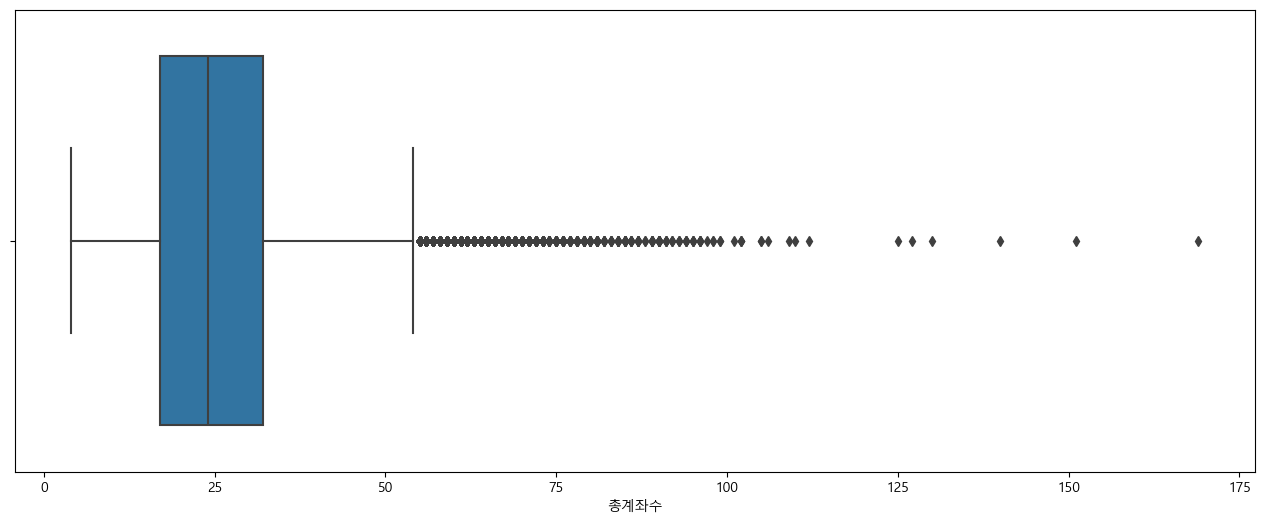

In [11]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=train, x='총계좌수', orient='h')
plt.show();

In [12]:
train['총계좌수'].mean(), train['총계좌수'].median()

(25.30501292955728, 24.0)

In [13]:
train['총계좌수'].max(), train['총계좌수'].min()

(169, 4)

- boxplot에서 눈에 띄게 튀는 outlier를 특정하기 어려움
- drop 없이 머신러닝 전 전처리할 것
- mean과 median 값의 차이가 크지 않으므로 preprocessing 과정에서 정규화/표준화를 통해 분포 특성을 가장 잘 살리는 방식으로 전처리

**최근_2년간_연체_횟수**

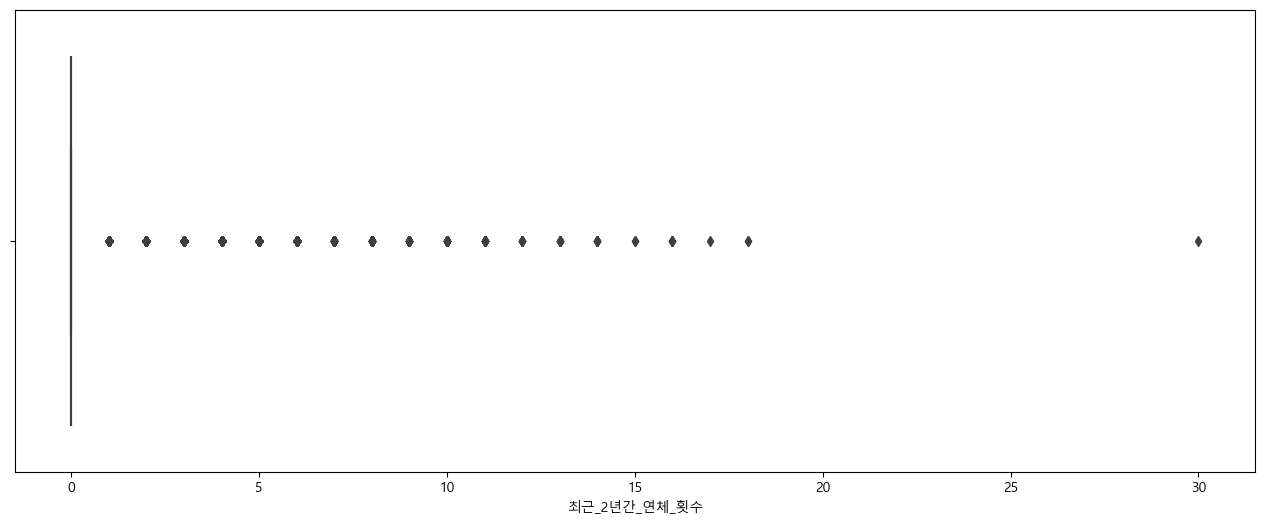

In [14]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=train, x='최근_2년간_연체_횟수', orient='h')
plt.show();

In [15]:
train[train['최근_2년간_연체_횟수'] > 24]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
57431,TRAIN_57431,18000000,36 months,< 1 year,RENT,168000000,10.23,64,기타,30,819192,391788.0,0.0,0.0,C


- 최근 2년간 연체 횟수가 24회 이상이 되려면 인당 대출 수가 2개 이상이고, 한 달에 두 번 이상 연체로 count된 건지?
- 1인 1대출이라고 가정했을 때, 24가 넘는 값은 outlier라고 볼 수 있음
- 최근 2년간 연체 횟수가 24가 넘는 값은 하나밖에 없으므로 해당 값을 outlier로 간주하고 drop.

In [16]:
train = train.drop(57431)
train[train['최근_2년간_연체_횟수'] > 24]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96290 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96290 non-null  object 
 1   대출금액          96290 non-null  int64  
 2   대출기간          96290 non-null  object 
 3   근로기간          96290 non-null  object 
 4   주택소유상태        96290 non-null  object 
 5   연간소득          96290 non-null  int64  
 6   부채_대비_소득_비율   96290 non-null  float64
 7   총계좌수          96290 non-null  int64  
 8   대출목적          96290 non-null  object 
 9   최근_2년간_연체_횟수  96290 non-null  int64  
 10  총상환원금         96290 non-null  int64  
 11  총상환이자         96290 non-null  float64
 12  총연체금액         96290 non-null  float64
 13  연체계좌수         96290 non-null  float64
 14  대출등급          96290 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.8+ MB


---

### 2. 범주형 변수 처리

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96290 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96290 non-null  object 
 1   대출금액          96290 non-null  int64  
 2   대출기간          96290 non-null  object 
 3   근로기간          96290 non-null  object 
 4   주택소유상태        96290 non-null  object 
 5   연간소득          96290 non-null  int64  
 6   부채_대비_소득_비율   96290 non-null  float64
 7   총계좌수          96290 non-null  int64  
 8   대출목적          96290 non-null  object 
 9   최근_2년간_연체_횟수  96290 non-null  int64  
 10  총상환원금         96290 non-null  int64  
 11  총상환이자         96290 non-null  float64
 12  총연체금액         96290 non-null  float64
 13  연체계좌수         96290 non-null  float64
 14  대출등급          96290 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.8+ MB


#### 대출기간

In [19]:
train['대출기간'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [20]:
train['대출기간'].value_counts()

대출기간
 36 months    64475
 60 months    31815
Name: count, dtype: int64

In [21]:
train['대출기간'].value_counts(normalize=True)

대출기간
 36 months    0.669592
 60 months    0.330408
Name: proportion, dtype: float64

- 대출기간은 36 months와 60 months 두 가지 항목으로 이루어져 있음
- 36 months가 60 months에 비해 두 배 가량 많음. 즉, 단기 대출 수요가 더 많음.
- 문자형을 숫자형으로 변환 > 36 months:3, 60months:5

In [22]:
train['대출기간'] = train['대출기간'].replace(' 36 months', 3).replace(' 60 months', 5)
train['대출기간'].value_counts()

대출기간
3    64475
5    31815
Name: count, dtype: int64

#### 근로기간

In [23]:
train['근로기간'].unique()

array(['6 years', '10+ years', '5 years', '8 years', 'Unknown', '9 years',
       '2 years', '1 year', '3 years', '7 years', '4 years', '< 1 year',
       '10+years', '<1 year', '3', '1 years'], dtype=object)

In [24]:
train['근로기간'].value_counts()

근로기간
10+ years    31585
2 years       8450
< 1 year      7773
3 years       7581
1 year        6249
Unknown       5668
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64

In [25]:
train['근로기간'].value_counts(normalize=True)

근로기간
10+ years    0.328020
2 years      0.087756
< 1 year     0.080725
3 years      0.078731
1 year       0.064898
Unknown      0.058864
5 years      0.058833
4 years      0.058033
8 years      0.050763
6 years      0.040233
7 years      0.039610
9 years      0.038883
10+years     0.009305
<1 year      0.003843
3            0.000924
1 years      0.000582
Name: proportion, dtype: float64

- 같은 기간을 의미하나, 라벨링이 다르게 된 항목이 다수 존재하므로 먼저 정리할 필요가 있음
    - '< 1 year', '<1 year' : <1 year
    - '1 year', '1 years' : 1 year
    - '3 years', '3' : 3 years
    - '10+ years', '10+years' : 10+ years

In [26]:
train['근로기간'] = train['근로기간'].replace('< 1 year', '<1 year').replace('1 years', '1 year')
train['근로기간'] = train['근로기간'].replace('3', '3 years').replace('10+years', '10+ years')

In [27]:
train['근로기간'].unique()

array(['6 years', '10+ years', '5 years', '8 years', 'Unknown', '9 years',
       '2 years', '1 year', '3 years', '7 years', '4 years', '<1 year'],
      dtype=object)

In [28]:
train['근로기간'].value_counts()

근로기간
10+ years    32481
2 years       8450
<1 year       8143
3 years       7670
1 year        6305
Unknown       5668
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
Name: count, dtype: int64

In [29]:
train['근로기간'].value_counts(normalize=True)

근로기간
10+ years    0.337325
2 years      0.087756
<1 year      0.084567
3 years      0.079655
1 year       0.065479
Unknown      0.058864
5 years      0.058833
4 years      0.058033
8 years      0.050763
6 years      0.040233
7 years      0.039610
9 years      0.038883
Name: proportion, dtype: float64

- 근로기간 column은 클래스 불균형이 있음
- 근로기간이 10년 이상인 사람의 수가 33%로, 타 클래스에 비해 유독 많은 분포를 보임
    - 이런 경우 10년 이상인 고객 비율과 타 클래스와의 비율을 맞춰주기 위해 클래스 **범주화**를 진행할 수 있음
- Unknown 클래스의 의미 파악 필요
    - Unknown이 비재직자인지, 다른 columns과의 비교를 통해 어떤 공통점을 갖는지 파악

In [30]:
tmp_unknown = train[train['근로기간']=='Unknown']
tmp_unknown.describe()

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,5.668000e+03,5668.000000,5.668000e+03,5668.000000,5668.000000,5668.000000,5.668000e+03,5.668000e+03,5668.000000,5668.000000
mean,1.409735e+07,3.413550,6.040308e+07,20.653384,23.912315,0.280346,6.605048e+05,3.189501e+05,67.911785,0.004058
std,8.973055e+06,0.810057,3.884670e+07,9.561189,11.671126,0.803373,7.401837e+05,3.535687e+05,1679.129754,0.066295
min,1.200000e+06,3.000000,6.000000e+06,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,7.200000e+06,3.000000,3.600000e+07,13.622500,15.000000,0.000000,2.411520e+05,9.351900e+04,0.000000,0.000000
50%,1.200000e+07,3.000000,5.400000e+07,20.445000,22.000000,0.000000,4.708620e+05,2.046540e+05,0.000000,0.000000
75%,1.875000e+07,3.000000,7.510379e+07,27.700000,31.000000,0.000000,8.758920e+05,4.162290e+05,0.000000,0.000000
max,4.200000e+07,5.000000,9.528000e+08,125.250000,95.000000,13.000000,2.163604e+07,3.558204e+06,72000.000000,2.000000


- 근로기간 == 'Unknown'인 값들의 다른 feature 값을 확인
- 숫자만 봐서는 특별한 분포가 보이지는 않음
- 특히 연간소득이 0인 값이 없으므로 '소득이 없는 비재직자'라고 간주하기엔 어려움이 있음
- 그래도 Unknown이라고 한데 묶여 있으니 어떠한 특징이 보일지도 모름 (왜 Unknown일까?!?!?!?!??)
    - 추후 시각화, 군집화 등을 통해 해당 부분에 대해 조금 더 파보는 걸로

#### 주택소유상태

In [31]:
train['주택소유상태'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY'], dtype=object)

In [32]:
train['주택소유상태'].value_counts()

주택소유상태
MORTGAGE    47932
RENT        37703
OWN         10654
ANY             1
Name: count, dtype: int64

In [33]:
train['주택소유상태'].value_counts(normalize=True)

주택소유상태
MORTGAGE    0.497788
RENT        0.391557
OWN         0.110645
ANY         0.000010
Name: proportion, dtype: float64

In [34]:
train[train['주택소유상태']=='ANY']

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
28730,TRAIN_28730,41160000,3,10+ years,ANY,93600000,17.71,20,기타,0,0,0.0,0.0,0.0,C


- ANY는 MORTAGAGE, RENT, OWN 중 어느 것에도 속하지 않는 것으로 보임
- 뭐인지 알 수는 없으나 딱히 특별한 점이 보이지 않고, 약 10만 개 데이터 중 1개밖에 없으므로 drop

In [35]:
train = train[train['주택소유상태']!='ANY']

In [36]:
train[train['주택소유상태']=='ANY']

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급


In [37]:
train['주택소유상태'].unique()

array(['RENT', 'MORTGAGE', 'OWN'], dtype=object)

In [38]:
train['주택소유상태'].value_counts()

주택소유상태
MORTGAGE    47932
RENT        37703
OWN         10654
Name: count, dtype: int64

#### 대출목적

In [39]:
train['대출목적'].unique()

array(['부채 통합', '주택 개선', '주요 구매', '휴가', '의료', '자동차', '신용 카드', '소규모 사업',
       '기타', '이사', '주택', '재생 에너지'], dtype=object)

In [40]:
train['대출목적'].value_counts()

대출목적
부채 통합     55149
신용 카드     24498
주택 개선      6160
기타         4723
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: count, dtype: int64

In [41]:
train['대출목적'].value_counts(normalize=True)

대출목적
부채 통합     0.572745
신용 카드     0.254422
주택 개선     0.063974
기타        0.049050
주요 구매     0.018725
의료        0.010790
자동차       0.008277
소규모 사업    0.008173
이사        0.005255
휴가        0.004840
주택        0.003126
재생 에너지    0.000623
Name: proportion, dtype: float64

- 대출목적 중 '부채 통합'이 50% 이상으로 가장 많은 부분을 차지하고 있다.
- '주택 개선'과 '이사', '주택'은 주거와 관련한 항목이므로 '주거' 항목으로 통합
- '신용 카드'와 '주요 구매' 역시 '구매' 카테고리로 통합
- '재생 에너지'는 어디에 쓰이는지 감도 안 잡힘

In [42]:
train['대출목적'] = train['대출목적'].replace('신용 카드', '구매').replace('주요 구매', '구매')
train['대출목적'] = train['대출목적'].replace('주택 개선', '주거').replace('이사', '주거').replace('주택', '주거')

In [43]:
train['대출목적'].unique()

array(['부채 통합', '주거', '구매', '휴가', '의료', '자동차', '소규모 사업', '기타', '재생 에너지'],
      dtype=object)

In [44]:
train['대출목적'].value_counts()

대출목적
부채 통합     55149
구매        26301
주거         6967
기타         4723
의료         1039
자동차         797
소규모 사업      787
휴가          466
재생 에너지       60
Name: count, dtype: int64

In [45]:
train['대출목적'].value_counts(normalize=True)

대출목적
부채 통합     0.572745
구매        0.273146
주거        0.072355
기타        0.049050
의료        0.010790
자동차       0.008277
소규모 사업    0.008173
휴가        0.004840
재생 에너지    0.000623
Name: proportion, dtype: float64

---
---

## 02. 시각화
'대출 등급'에 따른 feature값 시각화

In [51]:
train.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')

- 연속형 변수(barplot)
    - 대출금액, 연간소득, 부채_대비_소득_비율, 총상환원금, 총상환이자, 총연체금액
- 이산형 변수(countplot)
    - 대출기간, 근로기간, 주택소유상태, 총계좌수, 대출목적, 최근_2년간_연체_횟수, 연체계좌수

In [52]:
from matplotlib import rcParams

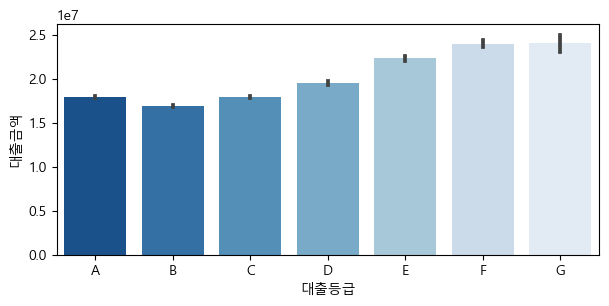

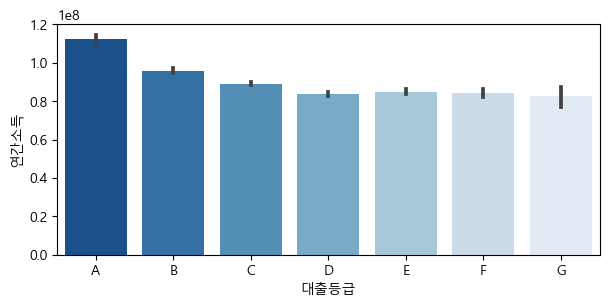

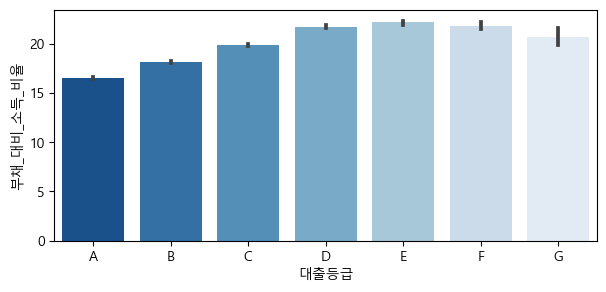

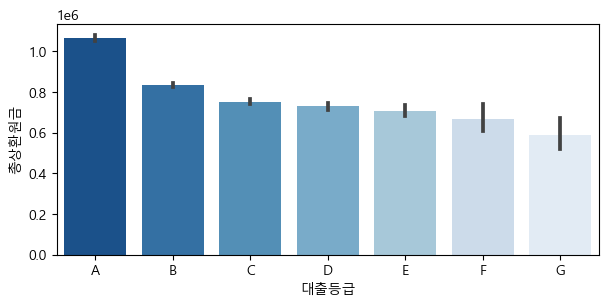

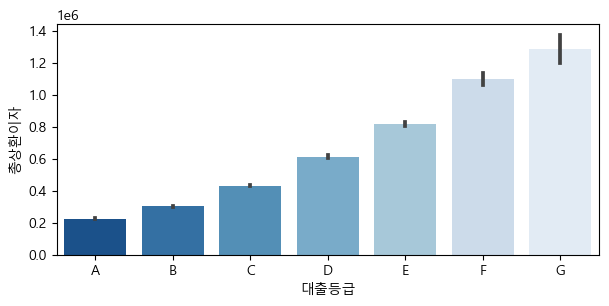

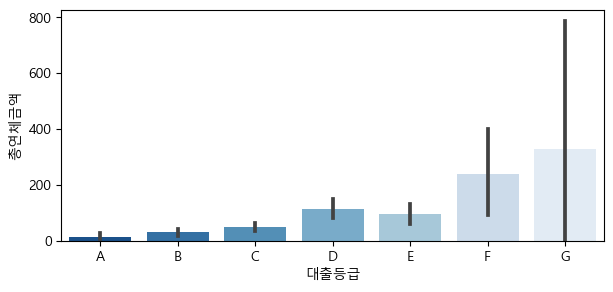

In [58]:
rcParams['figure.figsize'] = (7, 3)
bar_columns = ['대출금액', '연간소득', '부채_대비_소득_비율', '총상환원금', '총상환이자', '총연체금액']

for i in bar_columns:
    sns.barplot(data=train, x='대출등급', y=i, palette='Blues_r', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
    plt.show()

- 대출 등급이 낮아질수록(A->G) 대출금액이 증가하는 경향이 있다. (대출등급 A 제외)
    - 왜 A는 제외인지?
    - 다른 등급과 A 등급의 대출 목적 등에 어떤 차이가 있는지 분석해보자
    - 예상 : 신용등급이 높으면 주택 이런 거 투자하고 하는 데 대출 받고 갚고 많이 하니까 신용도도 높아지고, 주택 카테고리 대출 비중이 높지 않을까?
- 대출 등급이 낮아질수록 연간 소득이 감소하는 경향이 있다.
- 부채 대비 소득 비율은 E등급까지는 상승하나 그 이하 등급에서는 감소하는 추세
    - 부채 대비 소득 비율은 낮을 수록 신용에 좋음
    - 역시 A 등급의 DTI가 가장 낮음
    - 부채, 즉 대출 금액이 높고 연간 소득이 낮으면 DTI가 높아져야 하는데 왜 대출 금액이 많고, 연간 소득이 낮은 F, G 등급에서는 DTI가 감소 추세를 보였을까?
    - 시각화로 추세를 확인했으니, 대출 금액과 연간 소득간의 비를 수치로 접근해서 비교해볼 필요가 있음
- 대출 등급이 낮아질수록 총상환원금이 감소하는 경향이 있다.
- 대출 등급이 낮아질수록 총상환이자가 증가하는 경향이 있다.
    - 대출 등급이 낮아질수록 총상환원금은 감소하고, 총상환이자가 증가한다.
    - E, F, G 등급의 경우 총상환원금보다 총상환이자가 더 큰데 어떻게 된 일이뇨? 사채 아녀?
- 대출등급과 총연체금액 사이에서는 규칙적인 경향은 관찰되지 않으나, 대체로 대출등급이 낮아질수록 총연체금액이 증가한다고 볼 수 있다.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

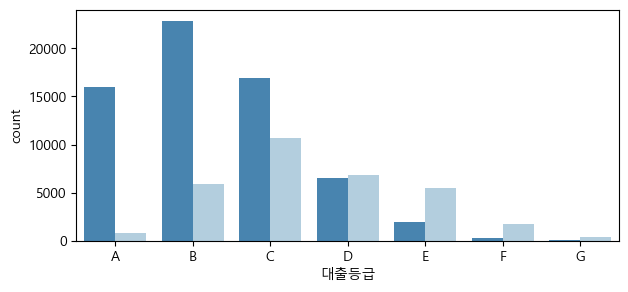

In [65]:
rcParams['figure.figsize'] = (7, 3)
count_columns = ['대출기간', '근로기간', '주택소유상태', '총계좌수', '대출목적', '최근_2년간_연체_횟수', '연체계좌수']

for i in count_columns:
    sns.countplot(data=train, x='대출등급', hue=i, palette='Blues_r', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
    plt.show()